In [1]:
import os
import torch
import numpy as np
import time
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
# model = YOLO('yolov8n.pt')
model = YOLO('yolov8m.pt')

100%|██████████████████████████████████████| 49.7M/49.7M [00:11<00:00, 4.53MB/s]


In [2]:
#  test the GPU
a=torch.Tensor(np.random.randn(640*8,8*640))
st=time.time()
for i in range(100):
    b=a*a
print('CPU:',time.time()-st)

a=a.cuda()
st=time.time()
for i in range(100):
    b=a*a
print('GPU:',time.time()-st)

CPU: 1.178804874420166
GPU: 0.0076215267181396484


In [3]:
model.cuda()
model.device

device(type='cuda', index=0)

In [4]:
vid = cv2.VideoCapture(0) 

In [5]:
ret, frame = vid.read() 

In [6]:
while(True): 
      
    # Capture the video frame 
    # by frame 
    st=time.time()
    ret, frame = vid.read() 
    if ret:
        results= model.track(frame, persist=True,stream=False)
        print(st-time.time())
            # Visualize the results on the frame
        annotated_frame = results[0].plot()

            # Display the annotated frame
        cv2.imshow("YOLOv8 Tracking", annotated_frame)

        # Display the resulting frame 
        # cv2.imshow('frame', frame) 

        # the 'q' button is set as the 
        # quitting button you may use any 
        # desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break


0: 480x640 1 laptop, 57.6ms
Speed: 2.3ms preprocess, 57.6ms inference, 60.4ms postprocess per image at shape (1, 3, 480, 640)
-0.5144796371459961

0: 480x640 1 tv, 4.4ms
Speed: 0.9ms preprocess, 4.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
-0.011754274368286133

0: 480x640 1 laptop, 5.0ms
Speed: 0.7ms preprocess, 5.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
-0.010927438735961914

0: 480x640 1 laptop, 4.4ms
Speed: 0.7ms preprocess, 4.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
-0.01085805892944336

0: 480x640 1 laptop, 5.1ms
Speed: 0.6ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
-0.010251998901367188

0: 480x640 1 laptop, 4.8ms
Speed: 0.9ms preprocess, 4.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
-0.0312962532043457

0: 480x640 1 laptop, 4.4ms
Speed: 0.7ms preprocess, 4.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
-0.035

In [7]:
len(results)

1

In [9]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [8]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([63.,  0.])
conf: tensor([0.8792, 0.4937])
data: tensor([[1.3514e+02, 3.6183e+02, 3.3759e+02, 4.7985e+02, 1.0000e+00, 8.7915e-01, 6.3000e+01],
        [3.8955e+02, 2.3841e+02, 6.3681e+02, 4.7186e+02, 2.0000e+00, 4.9373e-01, 0.0000e+00]])
id: tensor([1., 2.])
is_track: True
orig_shape: (480, 640)
shape: torch.Size([2, 7])
xywh: tensor([[236.3674, 420.8435, 202.4500, 118.0178],
        [513.1790, 355.1333, 247.2602, 233.4434]])
xywhn: tensor([[0.3693, 0.8768, 0.3163, 0.2459],
        [0.8018, 0.7399, 0.3863, 0.4863]])
xyxy: tensor([[135.1424, 361.8347, 337.5924, 479.8524],
        [389.5489, 238.4116, 636.8090, 471.8550]])
xyxyn: tensor([[0.2112, 0.7538, 0.5275, 0.9997],
        [0.6087, 0.4967, 0.9950, 0.9830]])

In [45]:
ind=np.where(results[0].boxes.cls==41)[0]
if len(ind)>0:
    out=list(results[0].boxes.xywh[ind[0]].numpy())
else:
    out='Nothing'
print(str(out))

Nothing


In [ ]:
# From here on - drafty experimentation with yolo segmentation

In [12]:
model = YOLO('yolov8s-seg.pt')

100%|██████████████████████████████████████| 22.8M/22.8M [00:06<00:00, 3.87MB/s]


In [16]:
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /home/ro/Documents/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 1 skateboard, 3.1ms
Speed: 0.9ms preprocess, 3.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


In [15]:
model.cuda()

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)


In [17]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [81]:
while(True): 
      
    # Capture the video frame 
    # by frame 
    st=time.time()
    ret, frame = vid.read() 
    if ret:
        results= model.track(frame, persist=True,stream=False)
        print(st-time.time())
            # Visualize the results on the frame
        annotated_frame = results[0].plot()

            # Display the annotated frame
        cv2.imshow("YOLOv8 Tracking", annotated_frame)

        # Display the resulting frame 
        # cv2.imshow('frame', frame) 

        # the 'q' button is set as the 
        # quitting button you may use any 
        # desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        
        cv2.destroyAllWindows()
        break


0: 480x640 1 tv, 1 laptop, 3.5ms
Speed: 14.1ms preprocess, 3.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
-0.029714107513427734

0: 480x640 1 person, 1 tv, 1 laptop, 3.0ms
Speed: 0.7ms preprocess, 3.0ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
-0.010225772857666016

0: 480x640 1 person, 1 tv, 1 laptop, 4.5ms
Speed: 0.9ms preprocess, 4.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
-0.013974189758300781

0: 480x640 1 person, 1 tv, 1 laptop, 4.2ms
Speed: 0.8ms preprocess, 4.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
-0.011165857315063477

0: 480x640 1 person, 1 tv, 1 laptop, 3.5ms
Speed: 0.6ms preprocess, 3.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
-0.011823177337646484

0: 480x640 1 person, 1 tv, 1 laptop, 3.5ms
Speed: 0.7ms preprocess, 3.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
-0.010954141616821289

0: 480x640 1 person, 1 tv, 1 book, 5

In [21]:
cv2.destroyAllWindows()

In [24]:
len(results)

1

In [27]:
results[0].boxes.xywh

tensor([[255.9433, 239.3392, 508.9121, 478.6783],
        [525.4581,  79.6674, 210.9941, 156.1857],
        [ 76.4930,  50.1652, 129.1956, 100.3304]])

In [53]:
mask_npy=results[0].masks[0].data.detach().cpu().numpy()[0,:,:]

In [71]:
mask_npy=results[0].masks[1].data.detach().cpu().numpy()[0,:,:]

In [72]:
import numpy as np
y,x=np.indices(mask_npy.shape)
sumx=np.sum(x*mask_npy)
sumy=np.sum(y*mask_npy)
tot=np.sum(mask_npy)
cog_x=sumx/tot
cog_y=sumy/tot

In [73]:
cog_x,cog_y

(535.0173789907312, 83.27130535530381)

250.60732838589982

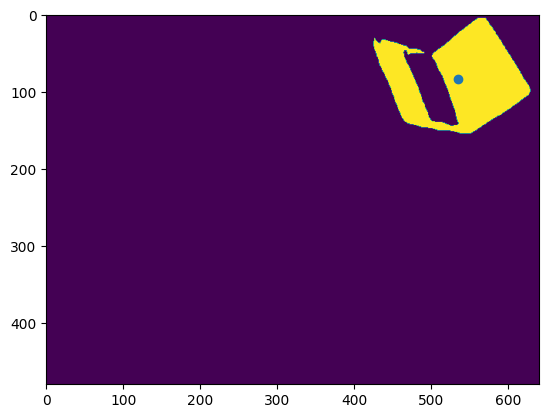

In [75]:
plt.imshow(results[0].masks[1].data.detach().cpu().numpy()[0,:,:])
plt.scatter([cog_x],[cog_y])

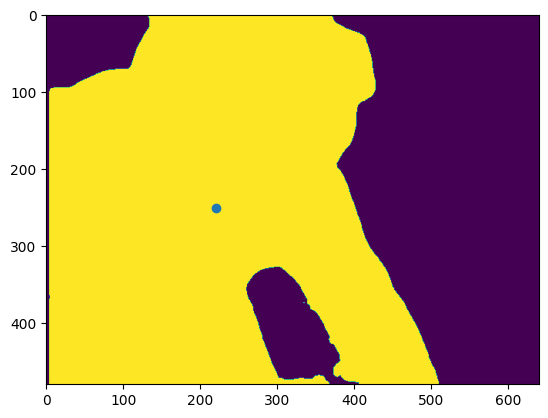

In [64]:
plt.imshow(results[0].masks[0].data.detach().cpu().numpy()[0,:,:])
plt.scatter([sumx/tot],[sumy/tot])

(0.0, 1.0)

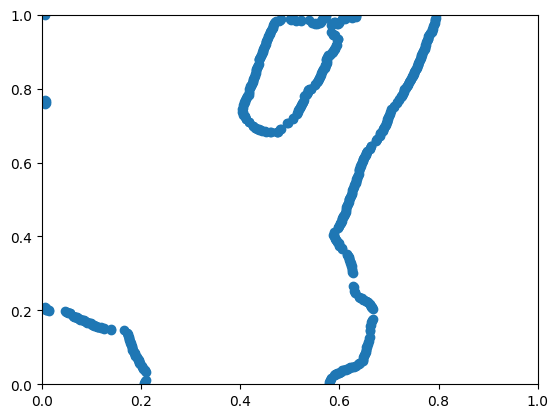

In [43]:
plt.figure()
plt.scatter(results[0].masks[0].xyn[0][:,0],results[0].masks[0].xyn[0][:,1])
plt.xlim([0,1])
plt.ylim([0,1])

ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

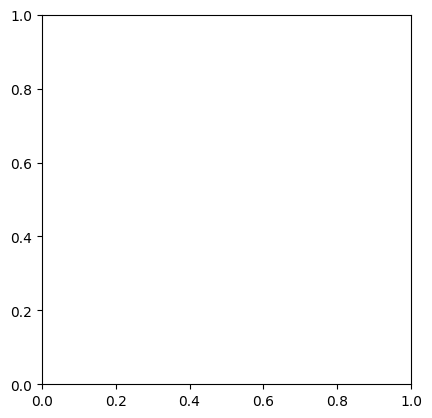

In [32]:
results[0].masks
plt.imshow(results[0].masks[0])